In [1]:
import pandas as pd
import re

In [ ]:
# You can Run git clone from the command line within colab notebook environment
# Google Colab : https://colab.research.google.com/
# The below dataset can be obtained from yahoo finance
# But for ease, I have made it available on my GitHub Repositry

!git clone https://github.com/sigadavid96/TwitterSentimentResearch

Cloning into 'TwitterSentimentResearch'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
# !ls /content/drive/MyDrive/TwitterAnalysis/

In [2]:
df=pd.read_csv("/content/CleanedData10K.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'created_at', 'id', 'id_str', 'text',
       'display_text_range', 'source', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'entities', 'favorited', 'retweeted', 'filter_level', 'lang',
       'matching_rules', 'verified', 'favourites_count', 'user-screen_name',
       'user-location', 'hashtag_list', 'extended_tweet',
       'extended_tweet-full_text', 'extended_entities', 'possibly_sensitive',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'quoted_status_permalink', 'quoted_status-user-screen_name',
       'quoted_status-text', 'quoted_status-extended_tweet-full_text',
       'place-country', 'place-country_code', 'location-coordinates', 'scopes',
       'processed_text

In [4]:
df.head()

,Unnamed: 0,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_permalink,quoted_status-user-screen_name,quoted_status-text,quoted_status-extended_tweet-full_text,place-country,place-country_code,location-coordinates,scopes,processed_texts,POS
0,0,Wed Mar 30 23:59:53 +0000 2022,1509319534481653762,1509319534481653762,@MightyHeaton Man I could $50k from government...,"[14, 85]","<a href=""http://twitter.com/download/iphone"" r...",False,1.509185e+18,1.509185e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mightyheaton man could 50k government want,"[('mightyheaton', 'NN'), ('man', 'NN'), ('coul..."
1,1,Wed Mar 30 23:53:44 +0000 2022,1509317985370050577,1509317985370050577,I NEED TO PURCHASE A LIGHT PINK/BUBBLEGUM PINK...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,need purchase light pink bubblegum pink bikini...,"[('need', 'JJ'), ('purchase', 'NN'), ('light',..."
2,2,Wed Mar 30 23:51:54 +0000 2022,1509317526496370694,1509317526496370694,How can MoCo government support small business...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.509315e+18,1.509315e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moco government better another massive disrupt...,"[('moco', 'JJ'), ('government', 'NN'), ('bette..."
3,3,Wed Mar 30 23:49:10 +0000 2022,1509316837959417857,1509316837959417857,@TeniEntertainer @TeniEntertainer @TeniEnterta...,"[17, 109]","<a href=""http://twitter.com/download/android"" ...",False,1.509218e+18,1.509218e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenientertainer tenientertainer tenientertaine...,"[('tenientertainer', 'NN'), ('tenientertainer'..."
4,4,Wed Mar 30 23:45:04 +0000 2022,1509315806768816135,1509315806768816135,"""There's a lot of demand out there for people ...",NaN,"<a href=""http://www.socialnewsdesk.com"" rel=""n...",True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lot demand people like local shop open,"[('lot', 'NN'), ('demand', 'NN'), ('people', '..."


In [5]:
df['hashtag_list']

0                                                       []
1                                                       []
2                                                       []
3                                                       []
4                                                       []
                               ...                        
10016                                                   []
10017                                                   []
10018                                                   []
10019    [{'text': 'entrepreneur', 'indices': [81, 94]}...
10020                                                   []
Name: hashtag_list, Length: 10021, dtype: object

In [6]:
# Pulling all hashtags
hash=df[['hashtag_list']].fillna("[]")
hashlist=[]
for i in hash['hashtag_list']:
  # print(type(i),i)
  if len(i) != 0:
    # print(type(i))
    for j in re.findall(r'\w+', i):
      if len(j)>3 and j not in ['text','indices']:
        hashlist.append(j)

In [7]:
# importing Counter module
from collections import Counter
w = Counter(hashlist)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


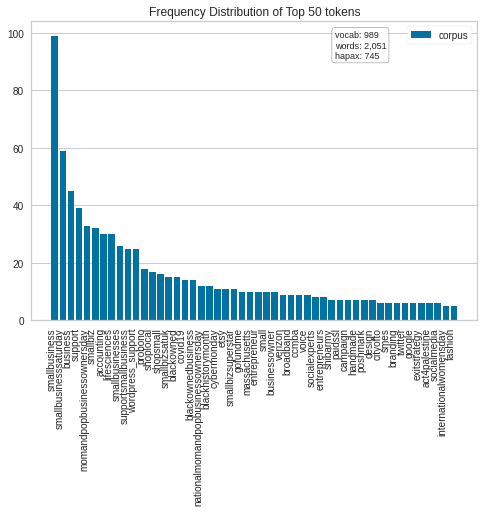

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

# # Load the text data
# corpus = load_hobbies()

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(hashlist)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [9]:
w.most_common(50)

[('SmallBusinessSaturday', 53),
 ('smallbusiness', 51),
 ('SmallBusiness', 48),
 ('MomandPopBusinessOwnersDay', 31),
 ('business', 30),
 ('accounting', 30),
 ('LifeSciences', 30),
 ('smallbiz', 27),
 ('WordPress_Support', 25),
 ('supportsmallbusiness', 22),
 ('support', 21),
 ('probono', 18),
 ('Support', 18),
 ('SmallBusinesses', 17),
 ('BlackOwned', 14),
 ('Business', 14),
 ('COVID19', 13),
 ('BlackOwnedBusiness', 13),
 ('SmallBizSatUK', 13),
 ('BlackHistoryMonth', 12),
 ('SmallBizSuperstar', 11),
 ('Massachusetts', 10),
 ('businessowner', 10),
 ('ShopLocal', 10),
 ('GoFundMe', 10),
 ('Verizon', 9),
 ('Broadband', 9),
 ('Voice', 9),
 ('CCMBA', 9),
 ('CyberMonday', 9),
 ('socialexperts', 8),
 ('smallbusinesses', 8),
 ('shopsmall', 8),
 ('ShopSmall', 8),
 ('PaidSsl', 7),
 ('handmade', 7),
 ('shoplocal', 7),
 ('Poshmark', 7),
 ('campaign', 7),
 ('SHIBARMY', 7),
 ('CityofTO', 6),
 ('NationalMomAndPopBusinessOwnersDay', 6),
 ('Google', 6),
 ('exitstrategy', 6),
 ('twitter', 6),
 ('SMEs', 

Starting Data Analyis

In [10]:
df_tweets=df

In [11]:

!pip install preprocessor
!pip install country_converter

In [12]:
!pip install python-twitter

NGRAM Analysis

In [13]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
# ref : https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]
  

In [15]:

words = basic_clean(''.join(str(df['processed_texts'].tolist())))

In [16]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

(please, share)         217
(share, u)              204
(mom, pop)              204
(owner, day)            148
(pop, owner)            146
(national, mom)         136
(trucker, convoy)       133
(u, trucker)            130
(convoy, stronger)      129
(black, owned)          126
(stronger, together)    126
(holiday, season)        90
(spread, word)           79
(u, help)                78
(would, help)            75
(help, spread)           72
(word, truth)            71
(truth, even)            71
(even, purchase)         71
(purchase, would)        69
(shop, local)            68
(photo, album)           66
(view, photo)            66
(hi, marine)             65
(redbubble, sell)        65
(album, view)            65
(photo, free)            65
(marine, redbubble)      65
(wan, na)                63
(family, owned)          61
dtype: int64

In [17]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:30]

Text(0.5, 0, '# of Occurances')

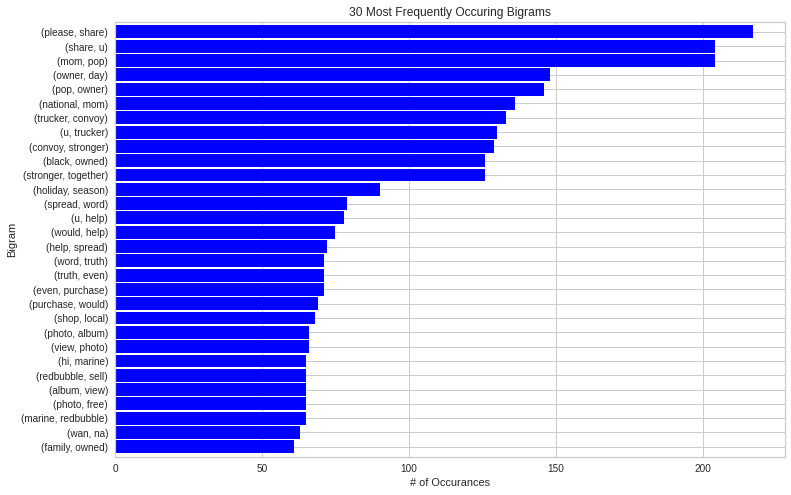

In [18]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('30 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

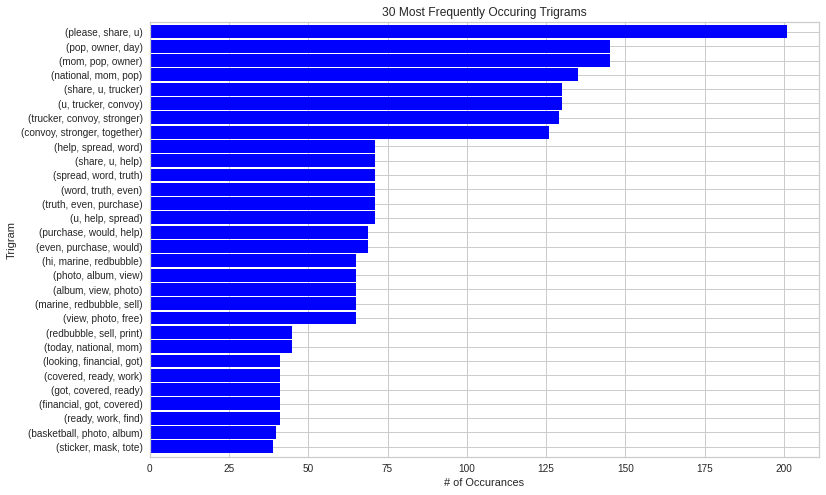

In [19]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('30 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

Sentiment Scores Appending

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [21]:
df['processed_texts']=df['processed_texts'].astype("string").fillna("")

In [22]:
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['processed_texts']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['processed_texts']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['processed_texts']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['processed_texts']]

In [53]:
df['pos'].mean(),df['neg'].mean(),df['neu'].mean(),df['compound'].mean()

(0.25796217942321226,
 0.043617503243189235,
 0.6866457439377228,
 0.29265582277217667)

In [73]:
# df.groupby(df['user-location'].mean()[['neg','neu','pos','compound']])

temp=df.groupby('user-location').agg({'neg': ['mean', 'count'],'neu': ['mean', 'count'],'pos': ['mean', 'count'],'compound': ['mean', 'count']})


In [78]:
temp['neg'].reset_index().sort_values(by=['count'],ascending=False).head(20).to_csv('neg.csv')

In [80]:
temp['pos'].reset_index().sort_values(by=['count'],ascending=False).head(20).to_csv('pos.csv')

In [81]:
temp['compound'].reset_index().sort_values(by=['count'],ascending=False).head(20).to_csv('compound.csv')

Get the dates into right format

In [65]:
temp.sort_values(by=['neg']['count'])

TypeError: ignored

In [23]:
df['created_at']=pd.to_datetime(df['created_at'],errors='coerce')

In [24]:
df1 = df.groupby(df['created_at'].dt.strftime('%m-%w')).mean()[['neg','neu','pos']]

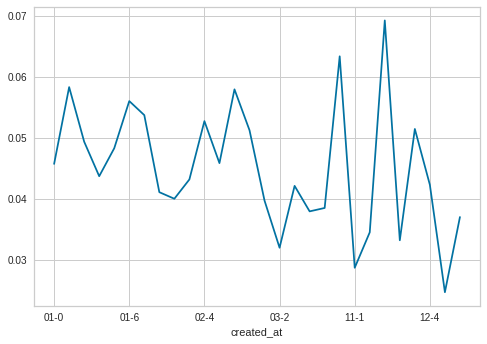

In [25]:
df1['neg'].plot()

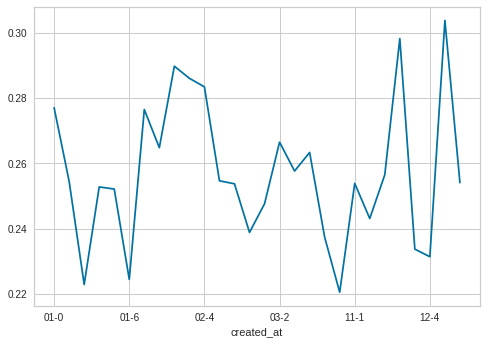

In [26]:
df1['pos'].plot()

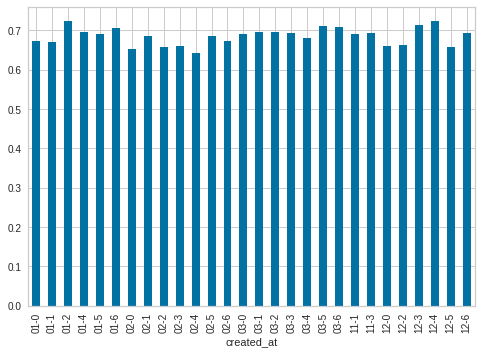

In [27]:
df1['neu'].plot.bar()

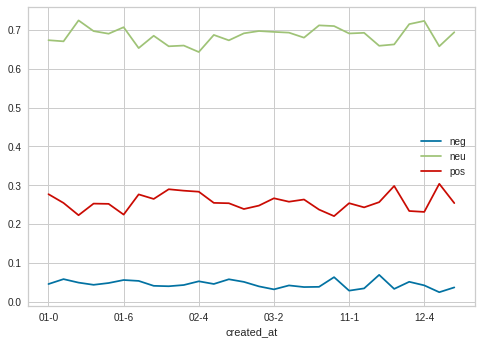

In [28]:
df1.plot()

Cleaning Location

In [29]:
loc_df=df[['user-location']]

In [30]:
loc_df=loc_df.drop_duplicates()

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Tws_analysis")
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# loc_df['user-location-new'] = loc_df['user-location'].apply(geocode)

In [ ]:
mylist=[]
for i in loc_df['user-location']:
  mylist.append(geocode(i))

KeyboardInterrupt: ignored

In [ ]:
mylist

[None,
 Location(Nanno, Ville d'Anaunia, Comunità della Val di Non, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38012, Italia, (46.3144754, 11.0480288, 0.0)),
 Location(Takoma Park, Montgomery County, Maryland, United States, (38.9778882, -77.0074765, 0.0)),
 Location(Lagos, Lagos Island, Lagos, 100242, Nigeria, (6.4550575, 3.3941795, 0.0)),
 Location(Davenport, Scott County, Iowa, 52801, United States, (41.5235808, -90.5770967, 0.0)),
 Location(University of California, Berkeley, Milvia Street, North Berkeley, Berkeley, Alameda County, California, 94709, United States, (37.8753497, -122.23963364918777, 0.0)),
 Location(Australia, (-24.7761086, 134.755, 0.0)),
 Location(Calvert County, Maryland, United States, (38.5288529, -76.537764, 0.0)),
 None,
 Location(California, United States, (36.7014631, -118.755997, 0.0)),
 None,
 None,
 None,
 Location(804 봉, 산동면, 구례군, 전라남도, 57602, 대한민국, (35.3312627, 127.4083876, 0.0)),
 None,
 Location(Hollywood, Broward County, Florida, United Stat

In [ ]:
import numpy as np

In [ ]:
len(loc_df['user-location'])

10021

In [ ]:
unq_locs=np.array(loc_df['user-location'].unique())
len(unq_locs)

3621

In [ ]:
for i in unq_locs:
  print(i)

It's coming from inside your tweet!
nan
Takoma Park, MD
Lagos, Nigeria
Davenport, Iowa
Berkeley, CA
Australia
Calvert County , Maryland
Stlmo.,Hinesville,Dallas...
California
Atlanta-ish
she/her || 17
Abuja only, for now
804
619✈228✈817✈301✈812✈540✈804
Hollywood, FL
under your bed
San Diego, CA
Spacecoast, FL 
Cairo, EGYPT
卍
Washington, DC
Irvine, CA
New Zealand
Los Angeles
Washington, D.C.
USA
Powder Springs, GA
World
Eastern Time Zone
 Freetown sierra Leone 
Oakland, CA
Las Vegas, NV
Philadelphia, PA
Durban, South Africa
Boston
Michigan
Witney, England
Tallahassee, FL
Manhattan, NY
Flint, MI
Morris County,  NJ
Enugu, Nigeria
Malden, MA
Accra, Ghana
Boston, MA
Phoenix, AZ
Jax, FL
Danville, IL
costa leona
Maui Hawaii
JahiNextCash Abuja 09034601743
New York State
Madison, WI
Oklahoma City, Oklahoma
New York City
Richardson, TX
Arlington, VA
Rhode Island, USA
Abuja Nigeria 
Overstrand, Norfolk
Lakewood, OH
75 Fox St, Imbumba House, JHB
Toronto, Ontario
Federal Capital Territory, Nig
Joha

In [ ]:
# loc_df = loc_df[~loc_df.user_location.str.contains("#")] 
# loc_df['extracted_user_location'] = loc_df['user_location'].apply(lambda x: list(nlp(x).ents) if len(list(nlp(x).ents))>0 else np.nan) #return na value if list is empty
# geolocator = Nominatim(user_agent="my-application")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=3, max_retries=5)
# loc_df[‘location’] = loc_df[‘user_location’].progress_apply(geocode, language=”en”) # Some locations are in hindi, chinese. Language=’en’ returns location in english
# loc_df[‘coordinates’] = loc_df[‘location’].apply(lambda loc: tuple(loc.point) if loc else None)
# loc_df[‘state’] = loc_df[‘location’].apply(lambda loc: loc[0].split(‘,’)[0] if loc else None)
# loc_df[‘country’] = loc_df[‘location’].apply(lambda loc: loc[0].split(‘,’)[-1] if loc else None)
# loc_df

,user-location
0,It's coming from inside your tweet!
1,NaN
2,"Takoma Park, MD"
3,"Lagos, Nigeria"
4,"Davenport, Iowa"
...,...
10016,"England, United Kingdom"
10017,Arizona
10018,"Dallas, TX"
10019,"Aus, SG, UAE, IN, FR"


Check verified count vs Biz analysis


In [31]:
# Only 5% have verified accounts
df['verified'].value_counts()

False      9450
True        569
Up Nort       1
Name: verified, dtype: int64

In [32]:
onlyVerifiedTrue=df[df['verified']=='True']
onlyVerifiedTrue['verified'].value_counts()


True    569
Name: verified, dtype: int64

In [33]:
onlyVerifiedTrue.columns

Index(['Unnamed: 0', 'created_at', 'id', 'id_str', 'text',
       'display_text_range', 'source', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'entities', 'favorited', 'retweeted', 'filter_level', 'lang',
       'matching_rules', 'verified', 'favourites_count', 'user-screen_name',
       'user-location', 'hashtag_list', 'extended_tweet',
       'extended_tweet-full_text', 'extended_entities', 'possibly_sensitive',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'quoted_status_permalink', 'quoted_status-user-screen_name',
       'quoted_status-text', 'quoted_status-extended_tweet-full_text',
       'place-country', 'place-country_code', 'location-coordinates', 'scopes',
       'processed_text

In [34]:
onlyVerifiedTrue[['user','user-screen_name']]['user'][0:1].values

array(["{'id': 69121742, 'id_str': '69121742', 'name': 'KWQC TV6 News', 'screen_name': 'kwqcnews', 'location': 'Davenport, Iowa', 'url': 'http://www.kwqc.com', 'description': 'Serving the Illinois & Iowa Quad Cities Area.\\nGot a story you want to see on air or on http://KWQC.com? Email us at news@kwqc.com or call 563-823-KWQC.', 'translator_type': 'none', 'protected': False, 'verified': True, 'followers_count': 62957, 'friends_count': 388, 'listed_count': 489, 'favourites_count': 1889, 'statuses_count': 108018, 'created_at': 'Wed Aug 26 22:49:11 +0000 2009', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': 'C0DEED', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_link_color': '3B94D9', 'profile_sidebar_border_co

In [35]:
# We have 478 of 569(verified user tweets) unique verified users!
unq_users=set(list(onlyVerifiedTrue['user-screen_name']))
len(unq_users)

478

In [36]:
unq_users

{'1019rock',
 '1053Rock',
 '1065MountainFM',
 '1067Rock',
 '19thnews',
 '1marcolopez',
 '25NewsKXXV',
 '921citi',
 '977rockGP',
 '981CHFI',
 '983StarFM',
 'AAPNewswire',
 'ABABankers',
 'ABC7Chicago',
 'AbbottCampaign',
 'AceHardware',
 'AirlieWalsh',
 'AlishaKShelton',
 'AllenBuansi',
 'AmericanExpress',
 'AmexBusinessUK',
 'ArabNewsBiz',
 'BCLiberalCaucus',
 'BITC',
 'BNDarticles',
 'BPC_Bipartisan',
 'BaberghDistrict',
 'BeccaBalintVT',
 'BenLaBolt46',
 'BenWinslow',
 'BerkeleyLaw',
 'BhutilaKarpoche',
 'BklynActiveMama',
 'BlaineMN',
 'BlinkNow',
 'BrianDavidPlatt',
 'BuffettECI',
 'BusinessNSW',
 'BusinessTO',
 'CBCLondon',
 'CBCManitoba',
 'CBS4Indy',
 'CD6Nury',
 'CFifeKW',
 'CHYM967',
 'CM_McDuffie',
 'CNBCTV18News',
 'CTrevien',
 'Calderdale',
 'CalgaryChamber',
 'CarolNdosi',
 'ChargeCLE',
 'CharlieAngusNDP',
 'ChaseCenter',
 'CheriDiNovo',
 'ChiOnwurah',
 'ChicagoBACP',
 'ChicagoDPD',
 'ChristinaPushaw',
 'CiscoSmallBiz',
 'CityNewsTO',
 'City_Press',
 'City_of_Helotes',
 'C

In [37]:
# Maybe verification isnt one of the biggest features of small biz owners!


Dwell into Sentiment of location 1 vs location 2 


In [38]:
len(df['user-location'].unique()),len(df['user-location'])
# We see 1:3 ratio of location to user


(3621, 10021)

In [39]:
# Adding time columns
df['month-year']=df['created_at'].dt.strftime('%m-%Y')
df['year']=df['created_at'].dt.strftime('%Y')

In [40]:
df.groupby(['user-location'],sort=False).mean()[['neg','neu','pos']]


,neg,neu,pos
user-location,,,
It's coming from inside your tweet!,0.000000,0.794000,0.206000
"Takoma Park, MD",0.056000,0.564000,0.380000
"Lagos, Nigeria",0.020036,0.723286,0.256696
"Davenport, Iowa",0.083500,0.778000,0.139000
"Berkeley, CA",0.115667,0.623333,0.261000
...,...,...,...
"414 N. 2nd St., Harrisburg, PA",0.000000,0.820000,0.180000
"Northside Pittsburgh, PA",0.000000,0.472000,0.528000
Wichita,0.000000,0.472000,0.528000


In [41]:
df_location_sentiment_counts=df.groupby(by='user-location').agg({'pos':'mean','neg':'mean','neu':'mean','id':'count'})
df_location_sentiment_counts=df_location_sentiment_counts.rename(columns={"id": "counts_per_location"})


In [42]:
df_plot=df_location_sentiment_counts.sort_values(by='counts_per_location', ascending=False)[:10]
df_plot.reset_index(inplace=True)
df_plot = df_plot.rename(columns = {'index':'new column name'})
df_plot

,user-location,pos,neg,neu,counts_per_location
0,United States,0.266621,0.040724,0.675422,116
1,"Williams & Fulton County, Ohio",0.260478,0.000000,0.739522,67
2,"London, England",0.265478,0.041851,0.692657,67
3,"New York, NY",0.347845,0.017655,0.600017,58
4,"Los Angeles, CA",0.299754,0.051421,0.648825,57
5,"Chicago, IL",0.293298,0.039053,0.632561,57
6,"Lagos, Nigeria",0.256696,0.020036,0.723286,56
7,Canada,0.179218,0.078127,0.742673,55
8,"Washington, DC",0.262038,0.032462,0.705481,52
9,"Toronto, Ontario",0.255327,0.070288,0.674404,52


In [43]:

df_plot

,user-location,pos,neg,neu,counts_per_location
0,United States,0.266621,0.040724,0.675422,116
1,"Williams & Fulton County, Ohio",0.260478,0.000000,0.739522,67
2,"London, England",0.265478,0.041851,0.692657,67
3,"New York, NY",0.347845,0.017655,0.600017,58
4,"Los Angeles, CA",0.299754,0.051421,0.648825,57
5,"Chicago, IL",0.293298,0.039053,0.632561,57
6,"Lagos, Nigeria",0.256696,0.020036,0.723286,56
7,Canada,0.179218,0.078127,0.742673,55
8,"Washington, DC",0.262038,0.032462,0.705481,52
9,"Toronto, Ontario",0.255327,0.070288,0.674404,52


In [44]:
def plot_my_df(df_plot,topk=15,year="ALL"):
  df_plot=df_plot[:topk].reset_index()
  y = df_plot['pos']
  z = df_plot['neg']
  df_plot['location-counts']=df_plot['user-location']+"-"+df_plot['counts_per_location'].astype(str) 
  n = df_plot['location-counts'].astype(str)
  fig, ax = plt.subplots()
  ax.scatter(z, y)
  ax.set_title('Positive Vs Negative Sentiment Analysis across Locations in year:'+year)
  ax.set_ylabel('Positive Sentiment')
  ax.set_xlabel('Negative Sentiment')

  for i, txt in enumerate(n):
      ax.annotate(txt, (z[i], y[i]))

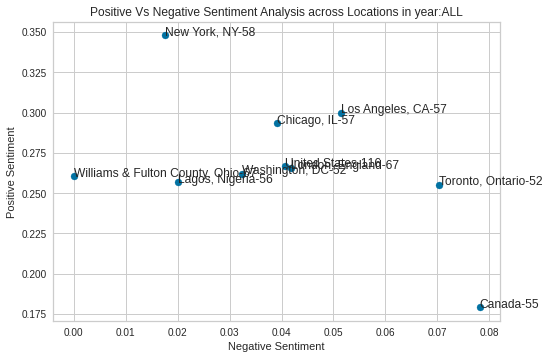

In [45]:
plot_my_df(df_plot)

Sentiment over time over location  

In [46]:
def get_plotdf_by_year(year):
  df_location_sentiment_counts=df.groupby(by=['user-location','year']).agg({'pos':'mean','neg':'mean','neu':'mean','id':'count'})
  df_location_sentiment_counts=df_location_sentiment_counts.rename(columns={"id": "counts_per_location"})
  df_plot=df_location_sentiment_counts.sort_values(by=['year','counts_per_location'], ascending=False)
  df_plot.reset_index(inplace=True)
  df_plot = df_plot.rename(columns = {'index':'new column name'})
  return df_plot.loc[df_plot['year'] == year]

In [47]:
df_plot_22=get_plotdf_by_year('2022')
df_plot_21=get_plotdf_by_year('2021')

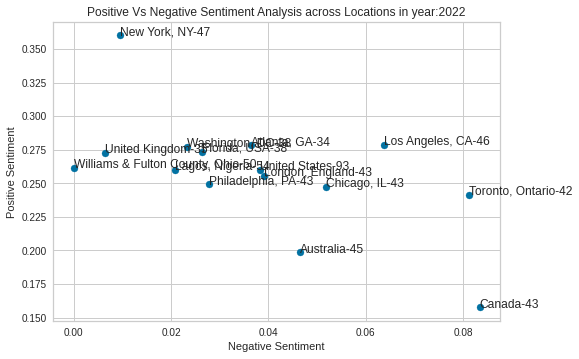

In [48]:
plot_my_df(df_plot_22,year='2022')

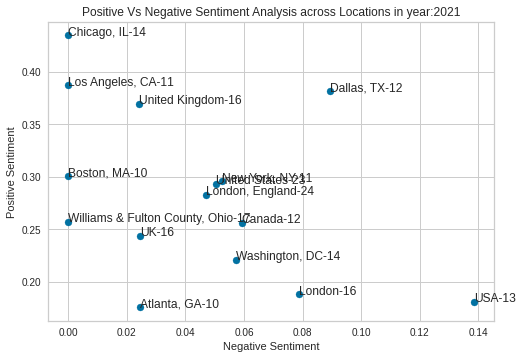

In [43]:
plot_my_df(df_plot_21,year='2021')

Reviewing new data

Getting Geo Data [Challenge due to computation]

In [ ]:
to_iso3_func = lambda x: coco.convert(names=x, to='iso3', not_found=None) if x is not None else x


In [ ]:
import country_converter as coco

# df_tweets['place-country_code'] = \
#                    df_tweets['place-country_code'].apply(to_iso3_func)

# change name to standard name
to_std_func = lambda x: coco.convert(names=x, to='name_short', not_found=None) \
                            if x is not None else x

df_tweets['place-country'] = \
                        df_tweets['place-country'].apply(to_std_func)

TypeError: ignored

In [ ]:
from geopy.geocoders import Nominatim
from tqdm import tqdm

tqdm.pandas()

def geo_locator(user_location):
    
    # initialize geolocator
    geolocator = Nominatim(user_agent='Tweet_locator')

    if user_location is not None:
        try :
            # get location
            location = geolocator.geocode(user_location, language='en')
            # get coordinates
            location_exact = geolocator.reverse(
                        [location.latitude, location.longitude], language='en')
            # get country codes
            c_code = location_exact.raw['address']['country_code']

            return c_code

        except:
            return None

    else : 
        return None

# apply geo locator to user-location
loc = df_tweets['user-location'].progress_apply(geo_locator)
df_tweets['user-country_code'] = loc


In [ ]:

# change codes to iso3 
df_tweets['user-country_code'] = \
                    df_tweets['user-country_code'].apply(to_iso3_func)

# create user-country column
df_tweets['user-country'] = \
                    df_tweets['user-country_code'].apply(to_std_func)

# drop old column
df_tweets.drop(['user-location'], axis=1, inplace=True)

In [ ]:
countries, codes = [], []
for idx, row in df_tweets.iterrows():
    if row['place-country_code'] is None:
        country = row['user-country']
        code = row['user-country_code']
        countries.append(country)
        codes.append(code)
    else :
        countries.append(row['place-country'])
        codes.append(row['place-country_code'])

df_tweets['location'] = countries
df_tweets['location_code'] = codes

# drop old columns
df_tweets.drop(columns=['place-country', 'place-country_code', 
                 'user-country', 'user-country_code'], inplace=True)

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

def cleaner(string):
    
    # Generate list of tokens
    doc = nlp(str(string))
    lemmas = [token.lemma_ for token in doc]
    # Remove tokens that are not alphabetic 
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() 
                 or lemma == '-PRON-'] 
    # Print string after text cleaning
    return ' '.join(a_lemmas)

df_tweets['text_cleaned'] = \
                   df_tweets['processed_texts'].progress_apply(cleaner)

In [ ]:
df_tweets.head()


In [ ]:
# uploadinf the csv to drive
df_tweets.to_csv('forSentiment.csv')